# Question 1 - Data Visualization
### Author: Kaifeng Luo - M6
### Date: 2025-02-05
### Description:
- This notebook visualizes diameter statistics from Excel files.
- It includes data preprocessing, histogram, boxplot, and scatter plots for analysis.


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# =============================================================================
# Data Loading and Preprocessing
# =============================================================================

# Set file path (adjust as needed)
data_file = r'C:/Users/ROG/Desktop/DSMP/Data Earth Sciences/mapping_combined.xlsx'

# Load data
df = pd.read_excel(data_file)

# Ensure Age(Ma) is numeric and drop missing values
df['Age(Ma)'] = pd.to_numeric(df['Age(Ma)'], errors='coerce')
df = df.dropna(subset=['Age(Ma)', 'Size.Mean.DiameterMax'])

# Create log-transformed Max Diameter Mean field
df['log_Size.Mean.DiameterMax'] = np.log(df['Size.Mean.DiameterMax'])

# Bin Age(Ma) into 10 intervals for boxplot comparison
df['Age_bin'] = pd.cut(df['Age(Ma)'], bins=10)

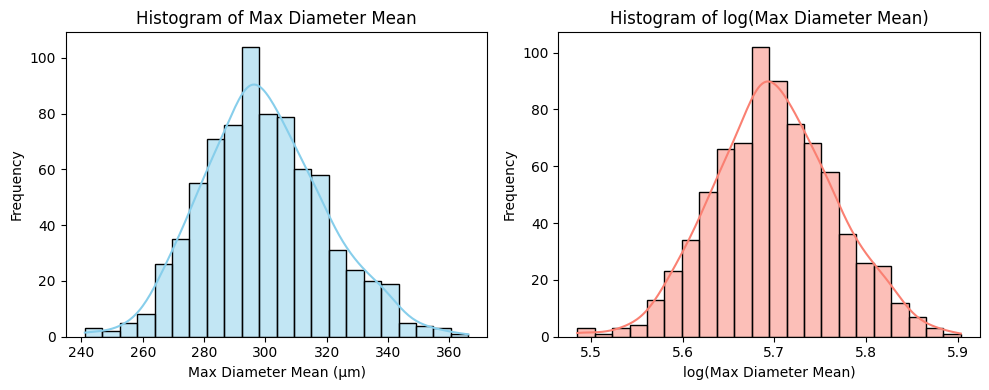

In [3]:
# =============================================================================
# Histograms & Density Charts
# =============================================================================

fig, axes = plt.subplots(1, 2, figsize=(10, 4), tight_layout=True)

# Left: Raw Max Diameter Mean histogram + KDE
sns.histplot(df['Size.Mean.DiameterMax'], kde=True, color='skyblue', ax=axes[0])
axes[0].set_title("Histogram of Max Diameter Mean")
axes[0].set_xlabel("Max Diameter Mean (µm)")
axes[0].set_ylabel("Frequency")

# Right: Log-transformed histogram + KDE
sns.histplot(df['log_Size.Mean.DiameterMax'], kde=True, color='salmon', ax=axes[1])
axes[1].set_title("Histogram of log(Max Diameter Mean)")
axes[1].set_xlabel("log(Max Diameter Mean)")
axes[1].set_ylabel("Frequency")

plt.show()

C:\Users\ROG\AppData\Local\Temp\ipykernel_23628\2281846276.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Age_bin", y="Size.Mean.DiameterMax", data=df, palette="Set3")


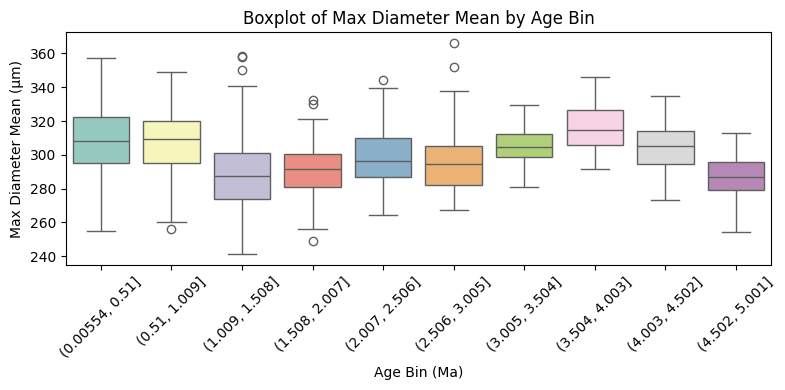

In [4]:
# =============================================================================
# Box plot (showing maximum diameter mean by age range)
# =============================================================================

plt.figure(figsize=(8, 4))
sns.boxplot(x="Age_bin", y="Size.Mean.DiameterMax", data=df, palette="Set3")
plt.title("Boxplot of Max Diameter Mean by Age Bin")
plt.xlabel("Age Bin (Ma)")
plt.ylabel("Max Diameter Mean (µm)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

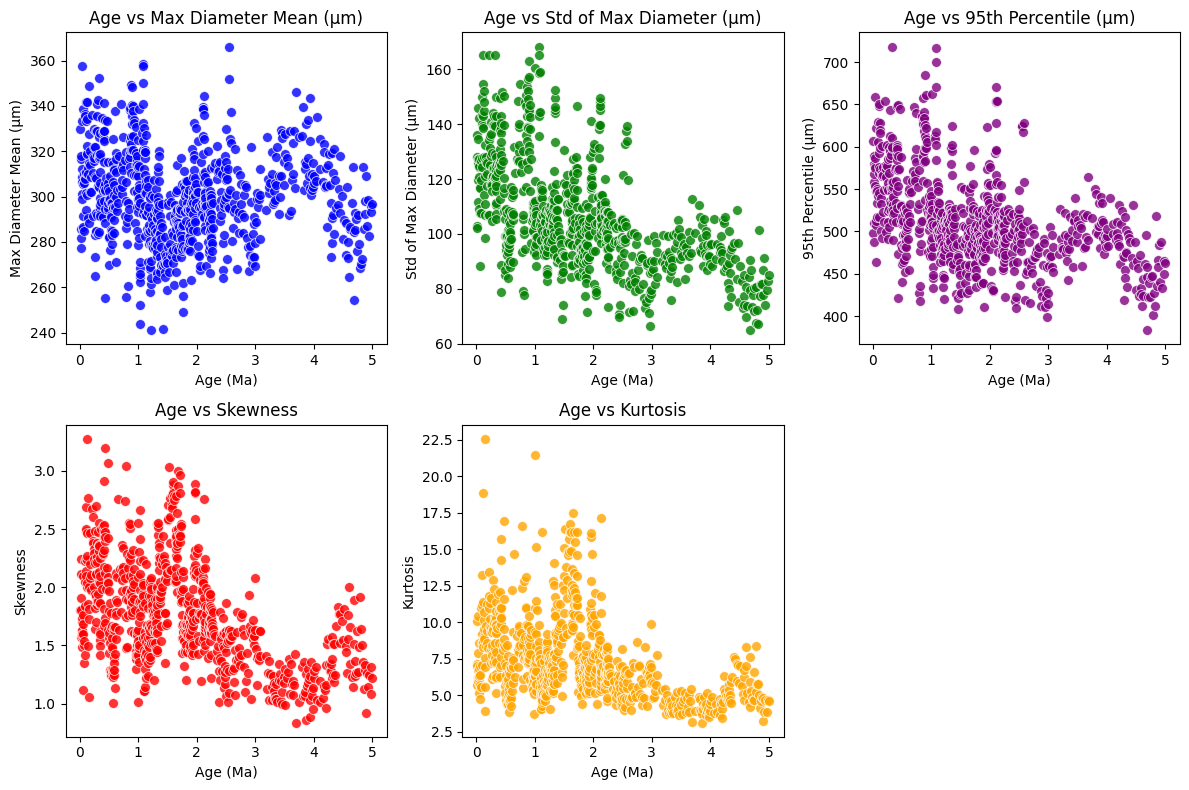

In [5]:
# =============================================================================
# Scatter Plots - Age vs Various Statistics
# =============================================================================

# Define scatter plot parameters: field name, title, color, and y-axis label
scatter_info = [
    ("Size.Mean.DiameterMax", "Max Diameter Mean (µm)", "blue"),
    ("Size.sd.DiameterMax", "Std of Max Diameter (µm)", "green"),
    ("Size.95.DiameterMax", "95th Percentile (µm)", "purple"),
    ("Size.skewness.DiameterMax", "Skewness", "red"),
    ("Size.kurtosis.DiameterMax", "Kurtosis", "orange")
]

# Create a 2x3 subplot grid (leave the last one empty if not needed)
fig, axes = plt.subplots(2, 3, figsize=(12, 8), tight_layout=True)
axes = axes.flatten()  # Flatten the 2D array into a 1D list for easy iteration

# Generate scatter plots for each parameter
for i, (field, y_label, color) in enumerate(scatter_info):
    sns.scatterplot(x="Age(Ma)", y=field, data=df, s=50, color=color, alpha=0.8, ax=axes[i])
    axes[i].set_title(f"Age vs {y_label}")
    axes[i].set_xlabel("Age (Ma)")
    axes[i].set_ylabel(y_label)

# Hide the last subplot if there are fewer parameters than available subplots
if len(axes) > len(scatter_info):
    axes[-1].axis('off')

# Display the plots
plt.show()


C:\Users\ROG\AppData\Local\Temp\ipykernel_23628\3096636420.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Age_bin", y="Size.sd.DiameterMax", data=df, palette="Pastel1")


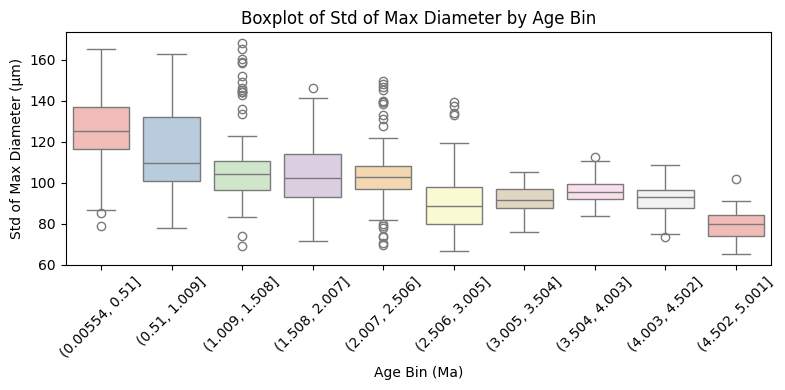

In [6]:
# =============================================================================
# Box plot showing standard deviation by age interval
# =============================================================================

plt.figure(figsize=(8, 4))
sns.boxplot(x="Age_bin", y="Size.sd.DiameterMax", data=df, palette="Pastel1")
plt.title("Boxplot of Std of Max Diameter by Age Bin")
plt.xlabel("Age Bin (Ma)")
plt.ylabel("Std of Max Diameter (µm)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

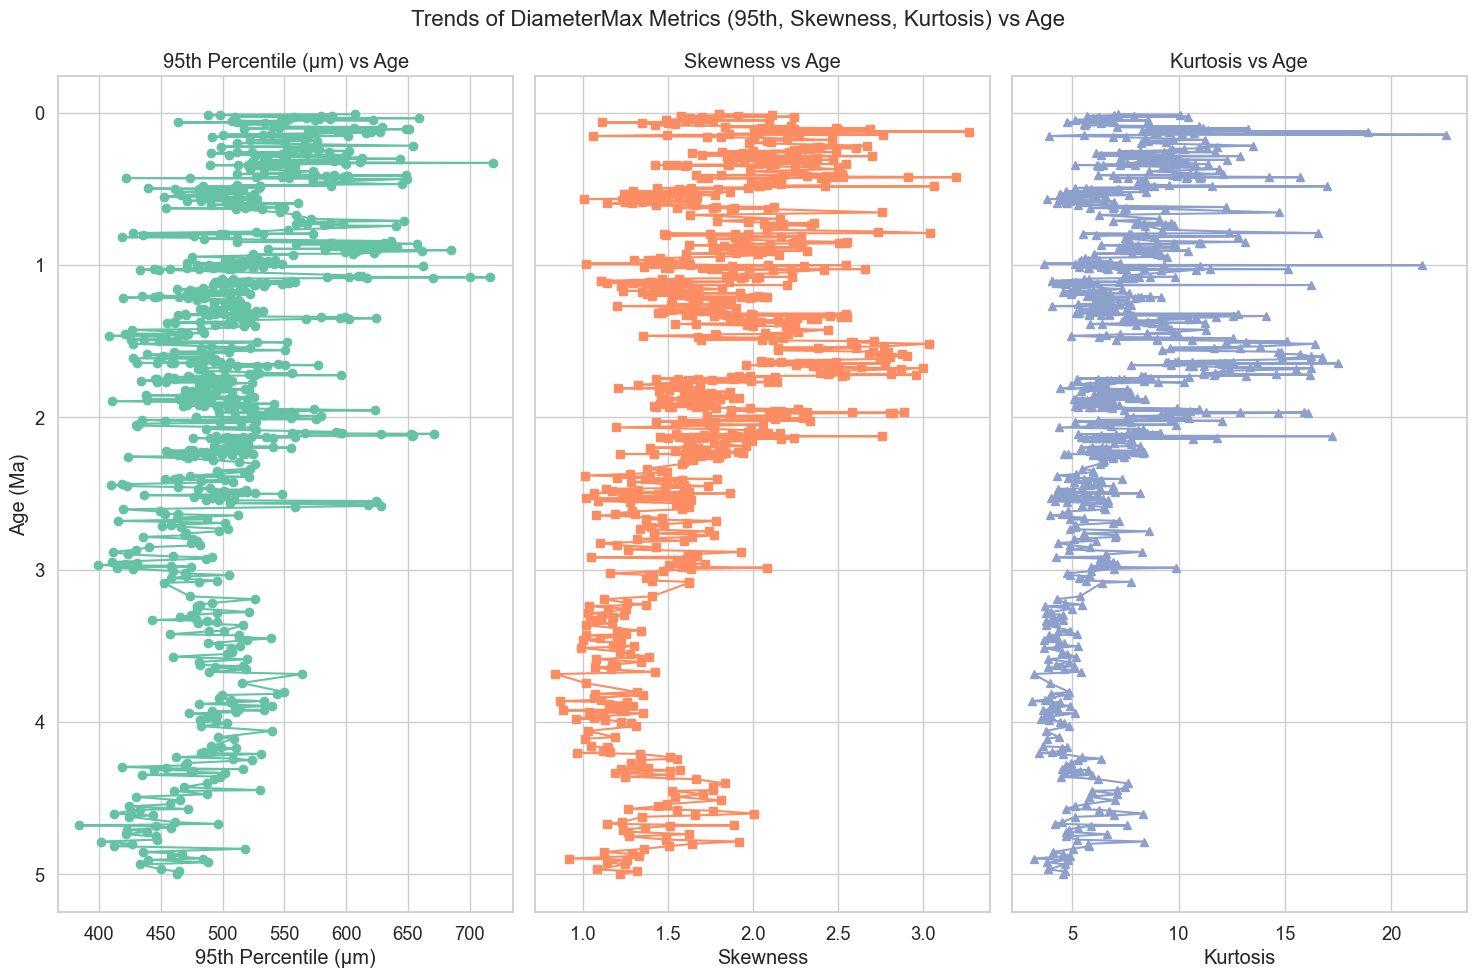

In [7]:
# Load data from Excel file
data_file = r'C:/Users/ROG/Desktop/DSMP/Data Earth Sciences/mapping_combined.xlsx'
df = pd.read_excel(data_file)

# Ensure Age(Ma) is numeric and drop missing values in critical columns
df['Age(Ma)'] = pd.to_numeric(df['Age(Ma)'], errors='coerce')
df.dropna(subset=['Age(Ma)', 
                  'Size.95.DiameterMax', 
                  'Size.skewness.DiameterMax', 
                  'Size.kurtosis.DiameterMax'], inplace=True)

# Sort data by Age(Ma) in ascending order
df.sort_values("Age(Ma)", ascending=True, inplace=True)

# =============================================================================
# 95th Percentile, Skewness, Kurtosis vs. Age(Ma)
# =============================================================================

# Set Seaborn style and font size
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)

# Create a 1-row, 3-column subplot grid with shared y-axis
fig, axes = plt.subplots(1, 3, figsize=(15, 10), sharey=True, tight_layout=True)

# Define the three metrics to plot
metrics = [
    ("Size.95.DiameterMax", "95th Percentile (µm)"),
    ("Size.skewness.DiameterMax", "Skewness"),
    ("Size.kurtosis.DiameterMax", "Kurtosis")
]

# Use Seaborn color palette; options include "Pastel1", "Set3", etc.
colors = sns.color_palette("Set2", 3)
markers = ['o', 's', '^']  # Different marker shapes for distinction

# Plot each metric on the corresponding subplot
for ax, (field, label), c, m in zip(axes, metrics, colors, markers):
    ax.plot(df[field], df["Age(Ma)"],
            color=c,
            linewidth=1.5,
            marker=m, markersize=6, markerfacecolor=c,
            label=label)
    
    # Invert the y-axis for geological time representation
    ax.invert_yaxis()
    
    # Set axis labels and title
    ax.set_xlabel(label)
    if ax == axes[0]:
        ax.set_ylabel("Age (Ma)")  # Show y-axis label only on the first subplot
    ax.set_title(f"{label} vs Age")

# Set overall title
plt.suptitle("Trends of DiameterMax Metrics (95th Percentile, Skewness, Kurtosis) vs Age", fontsize=16)

# Show the plots
plt.show()

